# Fetch - Data Anallyst Take Home Exercise

In [1]:
# import libs
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# import to run SQL queries
from sqlalchemy import create_engine, MetaData

## 1. Data Exploration and Data Preparation

This section provides a data exploration to identify data quality issues and potential challenges before using the data to answer business questions.

Necessary data processings are implemented in this section, prepared for the analysis in the section.

The datasets provided can be found under the same repository.

In [2]:
# data import
products = pd.read_csv("PRODUCTS_TAKEHOME.csv")
transaction = pd.read_csv("TRANSACTION_TAKEHOME.csv")
user = pd.read_csv("USER_TAKEHOME.csv")

#### 1.1 Overview of Data and Missing Values

First, let's take a look at the basic information of each dataset and what they look like.

- #### Product Table

In [3]:
# what the data look like
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [4]:
# basic information including number of records, missing values and data types
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [5]:
print("Number of Unique Brand (including NULL as a brand): ", len(products["BRAND"].unique()))
print("Number of Unique Barcode (including NULL): ", len(products["BARCODE"].unique()))

Number of Unique Brand (including NULL as a brand):  8123
Number of Unique Barcode (including NULL):  841343


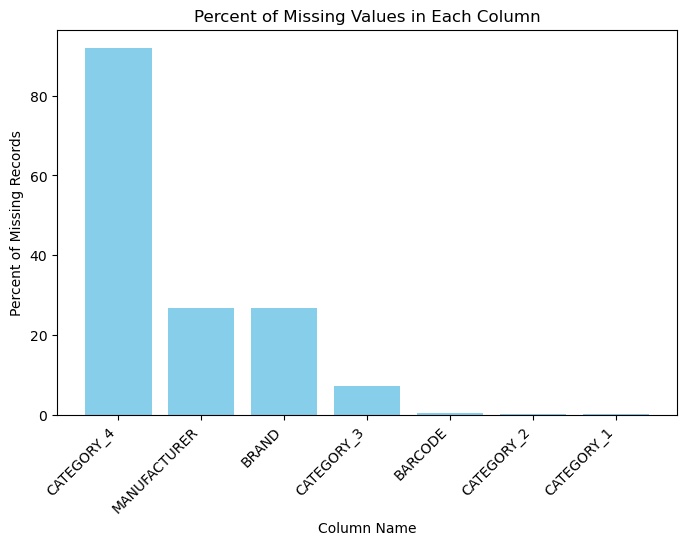

In [6]:
# calculate percent of missing values in each column
missing_val_products = 100.0 * products.isnull().mean()
missing_val_products.sort_values(ascending=False, inplace=True)

# plot
df_missiong_val_prod = pd.DataFrame({"Column Name": missing_val_products.index,
                                     "Percent of Missing Records": missing_val_products.values})

plt.figure(figsize=(8, 5))
plt.bar(df_missiong_val_prod["Column Name"], df_missiong_val_prod["Percent of Missing Records"], color='skyblue')
plt.title("Percent of Missing Values in Each Column")
plt.xlabel("Column Name")
plt.ylabel("Percent of Missing Records")
plt.xticks(rotation=45, ha="right")

plt.show()

***Data Quality Summary***: 

- Majority of data (over 90%) have missing CATEGORY_4.

- Over 220K out of 840K (about 26%) records in the Product table have missing brand name, which may affect the analysis on the top brands chosen by users.

- Over 4000 records (about 0.5%) records have missing Barcode, which is the foreign key. This may affect future analyses that involve joining with the transaction table.

- #### Transaction Table

In [7]:
# what the data look like
transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [8]:
# basic information including number of records, missing values and data types
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [9]:
transaction["FINAL_QUANTITY"].unique()

array(['1.00', 'zero', '2.00', '3.00', '4.00', '4.55', '2.83', '2.34',
       '0.46', '7.00', '18.00', '12.00', '5.00', '2.17', '0.23', '8.00',
       '1.35', '0.09', '2.58', '1.47', '16.00', '0.62', '1.24', '1.40',
       '0.51', '0.53', '1.69', '6.00', '2.39', '2.60', '10.00', '0.86',
       '1.54', '1.88', '2.93', '1.28', '0.65', '2.89', '1.44', '2.75',
       '1.81', '276.00', '0.87', '2.10', '3.33', '2.54', '2.20', '1.93',
       '1.34', '1.13', '2.19', '0.83', '2.61', '0.28', '1.50', '0.97',
       '0.24', '1.18', '6.22', '1.22', '1.23', '2.57', '1.07', '2.11',
       '0.48', '9.00', '3.11', '1.08', '5.53', '1.89', '0.01', '2.18',
       '1.99', '0.04', '2.25', '1.37', '3.02', '0.35', '0.99', '1.80',
       '3.24', '0.94', '2.04', '3.69', '0.70', '2.52', '2.27'],
      dtype=object)

***Data Quality Summary***: 

- Over 5K out of 50K (about 10%) records have missing barcode. These records can not be used in the analyses that involve identifying which product users purchased.

- The FINAL_QUANTITY column is not numerical. String 'zero' need to be replaced by a number 0 and and the column need to be converted to numeric type for analysis use.

- The unit of FINAL_QUANTITY and FINAL_SALE is ambiguous.


- #### User Table

In [10]:
# what the data look like
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [11]:
# basic information including number of records, missing values and data types
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


#### 1.2 Check Duplicates

In [12]:
print("Duplicate records in Product table: ", products.duplicated().sum())
print("Duplicate records in Transaction table: ", transaction.duplicated().sum())
print("Duplicate records in User table: ", user.duplicated().sum())

Duplicate records in Product table:  215
Duplicate records in Transaction table:  171
Duplicate records in User table:  0


***Data Quality Summary***: There are duplicates in Product table and Transaction table, indicating a data quality issue:

- One transaction record took place at the same time with same receipt ID and user ID can appear multiple times in the dataset;

- One product record with the same barcode can appear multiple times. 

The datasets need to be deduplicated to avoid causing inaccurate analysis results.

In [13]:
# drop duplicates and only keep the first occurrence for future use
products = products.drop_duplicates()
transaction = transaction.drop_duplicates()

#### 1.3 Range and Threshold Validation

This section checks whether the values in the datasets make sense - if there is any anomalies, unexpected values, or extreme values.

- #### Transaction Table

A sanity check of date time and the purchase quantity fields is provided.

In [14]:
# convert datetime to proper data type
transaction.loc[:, "PURCHASE_DATE"] = pd.to_datetime(transaction["PURCHASE_DATE"])

# replace 'zero' to '0' and convert the FINAL_QUANTITY to numerical type
transaction.loc[:, "FINAL_QUANTITY"] = transaction["FINAL_QUANTITY"].replace({'zero': '0'})
transaction.loc[:, "FINAL_QUANTITY"] = pd.to_numeric(transaction["FINAL_QUANTITY"])

# replace empty string to NULL and convert final_sale to numeric type
transaction.loc[:, "FINAL_SALE"] = pd.to_numeric(transaction["FINAL_SALE"], errors="coerce")

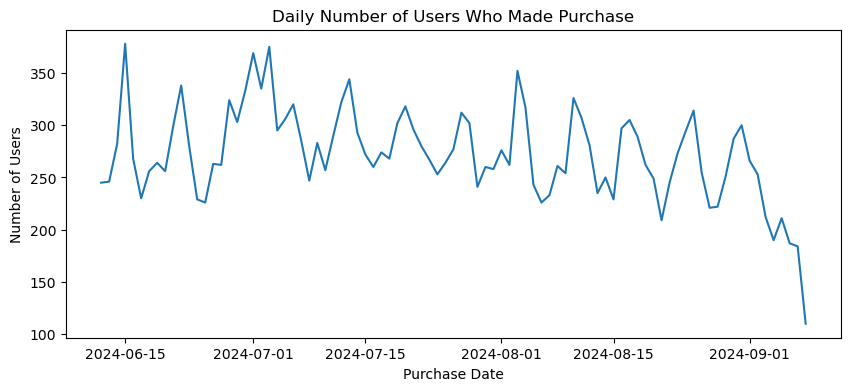

In [15]:
# calculate daily number of users who made purchase
daily_users = transaction.groupby(by="PURCHASE_DATE")["USER_ID"].nunique().reset_index(name="num_of_users").sort_values(by="PURCHASE_DATE")

plt.figure(figsize=(10, 4))
plt.plot(daily_users["PURCHASE_DATE"], daily_users["num_of_users"], linestyle='-')
plt.title("Daily Number of Users Who Made Purchase")
plt.xlabel("Purchase Date")
plt.ylabel("Number of Users")

plt.show()


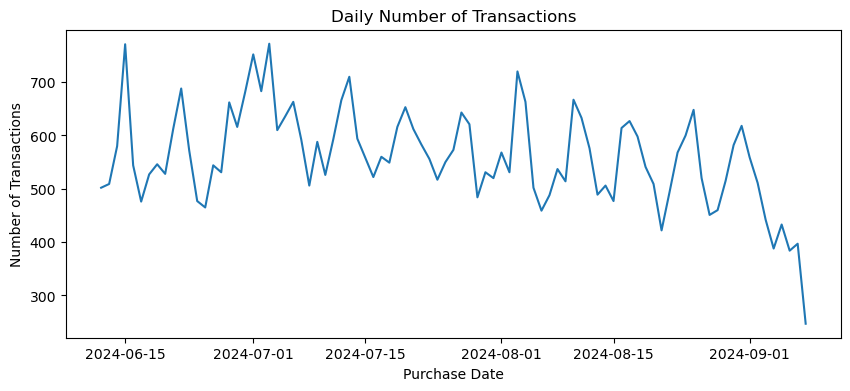

In [16]:
# calculate daily number of transactions
daily_purchase = transaction.groupby(by="PURCHASE_DATE")["RECEIPT_ID"].count().reset_index(name="num_of_transactions").sort_values(by="PURCHASE_DATE")

plt.figure(figsize=(10, 4))
plt.plot(daily_purchase["PURCHASE_DATE"], daily_purchase["num_of_transactions"], linestyle='-')
plt.title("Daily Number of Transactions")
plt.xlabel("Purchase Date")
plt.ylabel("Number of Transactions")

plt.show()

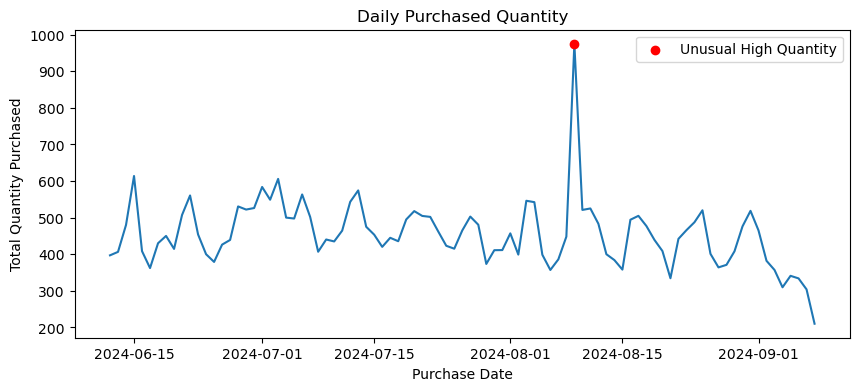

In [17]:
# calculate daily number of quantities
daily_quantity = transaction.groupby(by="PURCHASE_DATE")["FINAL_QUANTITY"].sum().reset_index(name="total_purchase_quantities").sort_values(by="PURCHASE_DATE")

plt.figure(figsize=(10, 4))  # Set figure size
plt.plot(daily_quantity["PURCHASE_DATE"], daily_quantity["total_purchase_quantities"], linestyle='-')

# Highlight the unusual high quantity on 2024-08-09
plt.scatter(["2024-08-09"], [975], color='red', label="Unusual High Quantity", zorder=3)


plt.title("Daily Purchased Quantity")
plt.xlabel("Purchase Date")
plt.ylabel("Total Quantity Purchased")
plt.legend()

plt.show()

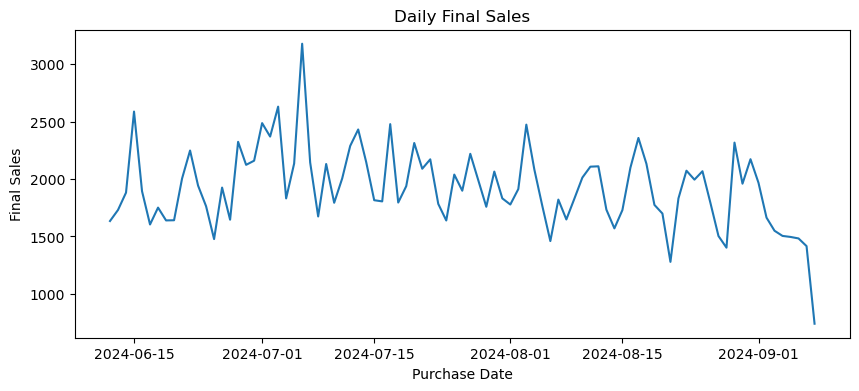

In [18]:
# calculate daily number of quantities
daily_sales = transaction.groupby(by="PURCHASE_DATE")["FINAL_SALE"].sum().reset_index(name="total_sales").sort_values(by="PURCHASE_DATE")

plt.figure(figsize=(10, 4))
plt.plot(daily_sales["PURCHASE_DATE"], daily_sales["total_sales"], 
         linestyle='-')

plt.title("Daily Final Sales")
plt.xlabel("Purchase Date")
plt.ylabel("Final Sales")

plt.show()

***Data Quality Summary***: According to the line charts, we can see a weekly pattern in the transactions. The pattern is obvious in the number of users who made purchase and the number of transaction made. There are two potential issues found in the visualizations:

- The normal daily quantity purchased is about 400-600, however, there is a spike with high quantity of 975 on 2024-08-09. This point represents a potential data anomoly or an unusual trend. To better understand the underlying issue, additional context is needed to determine if a specific event occurred on that day to explain the strike, or it is a data quality issue.

- All the charts show a drop at the end (early September). This may not represent a true decrease but could instead be caused by a cutoff in the data collection process. It's possible that we do not yet have the complete "most recent" data. Additional context or a follow-up with updated data is necessary to confirm this trend.

- #### Product Table: How many products under each brand

In [19]:
# count number of products under each brand
brand_agg = products.groupby(by="BRAND")["BARCODE"].nunique().reset_index(name="num_of_products")
brand_agg = brand_agg.sort_values("num_of_products", ascending=False)

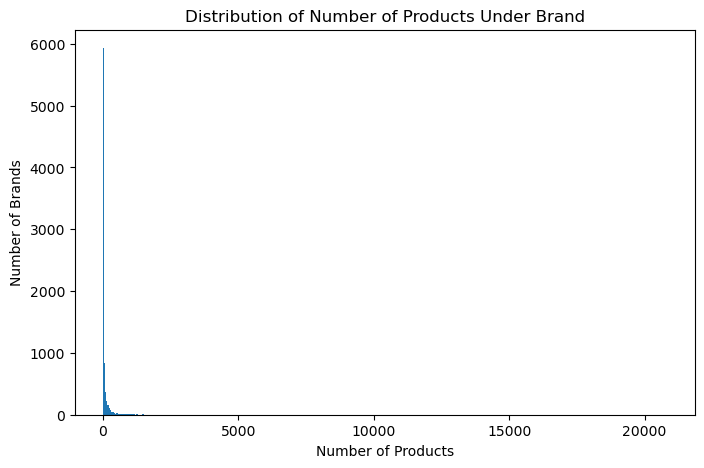

In [20]:
# plot the distribution of the number of products under each brand
plt.figure(figsize=(8, 5))
plt.hist(brand_agg["num_of_products"], bins=500)
plt.title("Distribution of Number of Products Under Brand")
plt.xlabel("Number of Products")
plt.ylabel("Number of Brands")

plt.show()

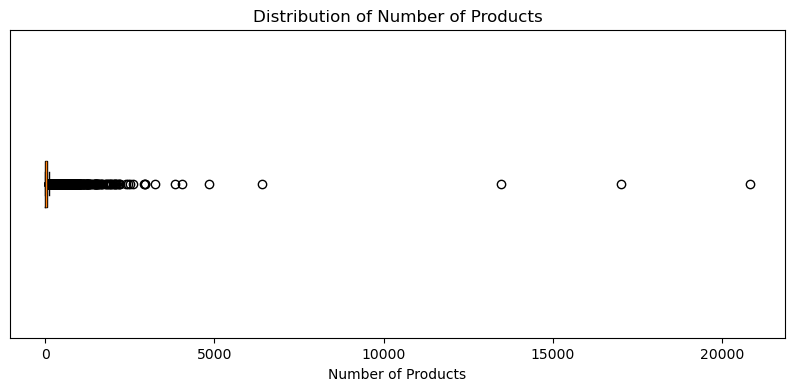

In [21]:
# boxplot of number of products under brand
plt.figure(figsize=(10, 4))
plt.boxplot(brand_agg["num_of_products"], vert=False)

plt.title("Distribution of Number of Products")
plt.xlabel("Number of Products")
plt.gca().axes.yaxis.set_visible(False)

plt.show()

In [22]:
print(f"Number of brands with over 1000 products: {len(brand_agg[brand_agg['num_of_products'] > 1000])}, \
      about {round(100.0*len(brand_agg[brand_agg['num_of_products'] > 1000])/len(brand_agg), 2)}% of all brands.")
print(f"Number of brands with over 5000 products: {len(brand_agg[brand_agg['num_of_products'] > 5000])}, \
      about {round(100.0*len(brand_agg[brand_agg['num_of_products'] > 5000])/len(brand_agg), 2)}% of all brands.")

Number of brands with over 1000 products: 85,       about 1.05% of all brands.
Number of brands with over 5000 products: 4,       about 0.05% of all brands.


***Data Summary***: There is no obvious issue. Over 6000 out of 8122 (about 75%) brands have less than 50 products (in the given dataset). There are 4 brands that have extreme high number (over 5000) of different products, with the maximum of 20K, which may large brands.

- #### User Table

The CREATE_DATE and BIRTH_DATE fields are examined here.

In [23]:
# get the year of the date fields
user["BIRTH_DATE"] = pd.to_datetime(user["BIRTH_DATE"])
user["CREATED_DATE"] = pd.to_datetime(user["CREATED_DATE"])

user["BIRTH_YEAR"] = user["BIRTH_DATE"].dt.year
user["CREATED_YEAR"] = user["CREATED_DATE"].dt.year

user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,BIRTH_YEAR,CREATED_YEAR
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female,2000.0,2020
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female,2001.0,2021
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female,1994.0,2023
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN,NaN,2023
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female,1972.0,2023


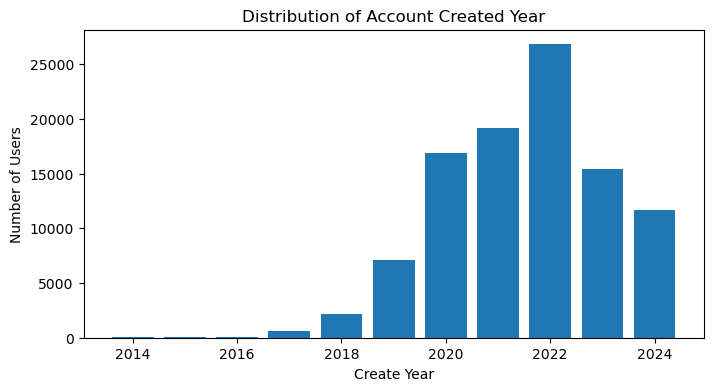

In [24]:
# distribution of birth year of the users
user_create_year = user.groupby(by="CREATED_YEAR")['ID'].count().reset_index(name="num_of_users")

# plot the distribution of the number of products under each brand
plt.figure(figsize=(8, 4))
plt.bar(user_create_year["CREATED_YEAR"], user_create_year["num_of_users"])

plt.title("Distribution of Account Created Year")
plt.xlabel("Create Year")
plt.ylabel("Number of Users")

# Show the plot
plt.show()

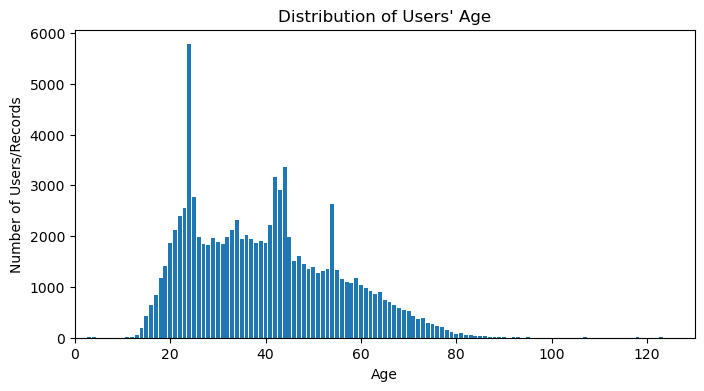

In [25]:
# calculate user's age
user["AGE"] = 2024 - user['BIRTH_YEAR']

# distribution of birth year of the users
user_age = user.groupby(by="AGE")['ID'].count().reset_index(name="num_of_users")

# plot the distribution of the number of products under each brand
plt.figure(figsize=(8, 4))
plt.bar(user_age["AGE"], user_age["num_of_users"])
plt.xlim(0, 130)

plt.title("Distribution of Users' Age")
plt.xlabel("Age")
plt.ylabel("Number of Users/Records")

# Show the plot
plt.show()

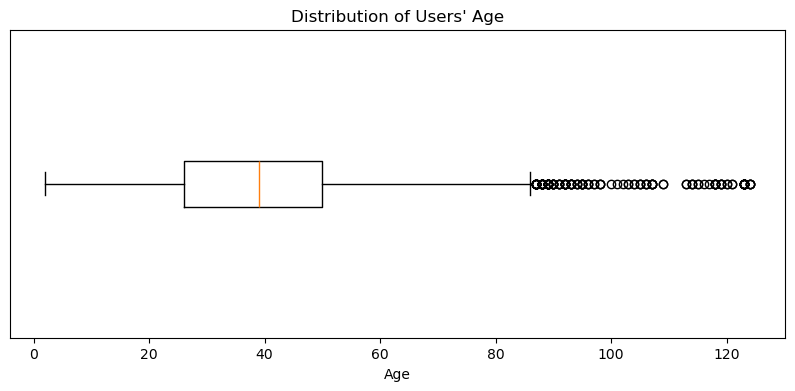

In [26]:
# boxplot of age
plt.figure(figsize=(10, 4))
plt.boxplot(user["AGE"].dropna(), vert=False)

plt.title("Distribution of Users' Age")
plt.xlabel("Age")
plt.gca().axes.yaxis.set_visible(False)

plt.show()

In [27]:
# records with age that indicate data entry issues
print(f"There are {len(user[user['AGE'] > 86])} out of {len(user)} records with age greater than 86.")
print(f"There are {len(user[user['AGE'] < 14])} out of {len(user)} records with age less than 14.")

There are 151 out of 100000 records with age greater than 86.
There are 94 out of 100000 records with age less than 14.


***Data Quality Summary:***

- Over 2000 users have an age less than 18, and 61 users have an age greater than 100 (oldest: 124) based on the BIRTH_DATE column.

- Records with over 100 years old are likely data anomalies, e.g., data entry issues and placeholder values. These records will be excluded from future analyses to ensure data accuracy.

- According to the boxplot, the IQR (Interquartile Range) of age in this dataset is [14, 86]. The data points outside this range are likely **outliers** to drop in the analysis. Further context is needed to determine if users must be at least 18 to register and place orders. This could indicate policy violations or data entry issues.

#### 1.4 Table Relationships

Since the datasets are related, this section checks the keys that match across tables.

In [28]:
# barcode in Transaction table and Product table
print(f"{len(transaction[~transaction["BARCODE"].isin(products["BARCODE"])])} out of {len(transaction)} \
      (about {100.0*len(transaction[~transaction["BARCODE"].isin(products["BARCODE"])])/len(transaction)}%)  of the records in Transaction table doesn't have a matched BARCODE in Product table.")

19320 out of 49829       (about 38.77260229986554%)  of the records in Transaction table doesn't have a matched BARCODE in Product table.


In [29]:
# convert columns to same data type
user["ID"] = user["ID"].astype(str)
transaction["USER_ID"] = transaction["USER_ID"].astype(str)

# user id in Transaction table and User table
print(f"{len(transaction[~transaction["USER_ID"].isin(user["ID"])])} out of {len(transaction)} \
      (about {100.0*len(transaction[~transaction["USER_ID"].isin(user["ID"])])/len(transaction)}%)  of the records in Transaction table doesn't have a matched USER_ID in User table.")

49568 out of 49829       (about 99.47620863352667%)  of the records in Transaction table doesn't have a matched USER_ID in User table.


***Data Quality Issue:*** 

- The majority of transactions (99%) don't't have a matching USER_ID in the User table. This means we are not able to identify who made the purchase for most transactions, and this will affect customer-level analysis in the next steps.

- Over 30% of transactions doesn't have a matched BARCODE in the Product table. This means we cannot track the product information of those transactions. This will affect product-level insights.

- Additional information needed to verify data integrity and investigate the root cause of missing USER_IDs. Potential issues can be
    - guest purchase where transactions are not linked to user accounts
    
    - inconsistency in information encryption or storage methods.

#### 1.5 Other Issues Noted

The datetime fields needs to be clarified - some of the columns have values ending with "Z", which may indicate UTC time. It can be a default time zone for the data stored in the system. For this analysis, we will ignore the "Z" and treat the date and timestamp as the same time zone of the fields without "Z" suffix.

## 2. Data Analysis (SQL Queries to Answer Questions)

This section provides SQL queries that answer specific business questions based on the given datasets. Please be noted that:
1. The datasets are deduplicated.

2. Missing values are kept.

3. SQLite is used here to run SQL queries. A SQLite in-memory database will be created. The three datasets will be stored as SQL table.

In [30]:
# create SQLite in-memory database
engine = create_engine("sqlite:///:memory:")

In [31]:
# Store datasets/dataframes to SQL tables
products.to_sql("product_table", con=engine, index=False, if_exists='replace')
transaction.to_sql("transaction_table", con=engine, index=False, if_exists='replace')
user.to_sql("user_table", con=engine, index=False, if_exists="replace")

100000

#### Question 1: What are the top 5 brands by receipts scanned among users 21 and over?

Assumptions:
- The latest transaction data we have is 2024/09/08. In this analysis, only users who are 21 and over by 2024/09/08 are included.

- Records with age over 86 are excluded (discussed in the data exploration section).

- Based on the data exploration, users who have an age over 100 are excluded.

- Records with missing barcode (in transaction table or product table) are excluded.

In [32]:
sql = """
        SELECT brand,
               COUNT(DISTINCT receipt_id) AS num_of_receipts
          FROM transaction_table tt
          LEFT JOIN user_table ut
            ON tt.user_id = ut.id
          LEFT JOIN product_table pt
            ON tt.barcode = pt.barcode
         WHERE DATE(birth_date, '+21 years') <= '2024-09-08'
           AND DATE(birth_date, '+86 years') >= '2024-09-08' -- exclude users with age above 86
           AND tt.barcode IS NOT NULL
           AND pt.barcode IS NOT NULL
           AND pt.brand IS NOT NULL
         GROUP BY brand
         ORDER BY num_of_receipts DESC
         LIMIT 10;
"""

df_q1 = pd.read_sql(sql, engine)
df_q1

,BRAND,num_of_receipts
0,NERDS CANDY,3
1,DOVE,3
2,TRIDENT,2
3,SOUR PATCH KIDS,2
4,MEIJER,2
5,HERSHEY'S,2
6,GREAT VALUE,2
7,COCA-COLA,2
8,UTZ,1
9,TWIX,1


***Summary***: Among users 21 and over, Nerds Candy and Dove got most scanned receipts. Trident, Sour Patch Kids, Meijer, Hershey's, Great Value and Coca-Cola have the same rank. However, due to the significant data issue of the majority transactions lacking a matching User ID in the provided user table, I recommend interpreting these results with caution. The analysis presented here offers a valid query structure that can be utilized once critical data integrity issues are resolved.

#### Question 2: Who are Fetch's power users?

Assumptions:

- "Power user" is defined as users who contribute to a large share of total sales in this analysis.

- Records with age over 86 and under 14 are excluded (discussed in the data exploration section).

- The time period is limited to June 2024 to September 2024 due to the dataset availability.

- The objective of this analysis is to determine the generation or age group of the most power users. While location/state and gender could also provide valuable demographic insights, these features are not included in the current analysis.

- Assume the data quality issues don't affect the results.

In [33]:
sql = """
    WITH user_base AS (
        SELECT *,
               CAST(strftime('%Y', '2024-09-08') AS INTEGER) - CAST(strftime('%Y', birth_date) AS INTEGER) 
               - (strftime('%m-%d', birth_date) > strftime('%m-%d', '2024-09-08')) AS age
    ),
    sale_by_age AS (
        SELECT CASE WHEN age >= 18 AND age < 25 THEN '18-24'
                    WHEN age < 35 THEN '25-34'
                    WHEN age < 45 THEN '35-44'
                    WHEN age < 55 THEN '45-54'
                    WHEN age < 65 THEN '55-64'
                    WHEN age >= 65 THEN '65+' END AS age_range,

               SUM(final_sale) total_sale
      FROM transaction_table tt
      JOIN user_table ut
        ON tt.user_id = ut.id
     WHERE DATE(birth_date, '+14 years') <= '2024-09-08' -- exclude users with age above 14
       AND DATE(birth_date, '+86 years') >= '2024-09-08' -- exclude users with age above 86
     GROUP BY CASE WHEN age >= 18 AND age < 25 THEN '18-24'
                   WHEN age < 35 THEN '25-34'
                   WHEN age < 45 THEN '35-44'
                   WHEN age < 55 THEN '45-54'
                   WHEN age < 65 THEN '55-64'
                   WHEN age >= 65 THEN '65+' END
    )

    SELECT *
      FROM sale_by_age
     ORDER BY total_sale DESC
"""

df_q2 = pd.read_sql(sql, engine)
df_q2

,age_range,total_sale
0,35-44,263.49
1,65+,238.32
2,55-64,152.26
3,45-54,149.80
4,25-34,80.99


***Summary***: In terms of the total sale, 

- Fetch's power users are primarily concentrated in middle-aged adults (35-44) and senior groups (65+).

- Users in group 55-64 and 45-54 contribute moderately to the total sales.

- Users in younger group, 25-34, contribute the lowest total sales.

#### Question 3: Which is the leading brand in the Dips & Salsa category?

Assumptions:

- "Leading brand" is determined by the total units/quantity of the product sold.

- Assume the data is complete for Dip & Salsa category. Transactions with missing barcodes or lack of category mapping are excluded from the analysis.

- Time period is limited to June to September 2024 due to the dataset availability.

In [34]:
sql = """
        SELECT brand,
               manufacturer,
               SUM(final_sale) AS total_sale
          FROM transaction_table tt
          LEFT JOIN product_table pt
            ON tt.barcode = pt.barcode
         WHERE tt.barcode IS NOT NULL
           AND pt.barcode IS NOT NULL
           AND pt.brand IS NOT NULL
           AND pt.category_2 = 'Dips & Salsa'
         GROUP BY brand,
                  manufacturer
         ORDER BY total_sale DESC
         LIMIT 5;
"""

df_q3 = pd.read_sql(sql, engine)
df_q3

,BRAND,MANUFACTURER,total_sale
0,TOSTITOS,PEPSICO,260.99
1,GOOD FOODS,GOOD FOODS,118.89
2,PACE,CAMPBELL SOUP COMPANY,118.58
3,MARKETSIDE,WALMART INC.,103.29
4,FRITOS,PEPSICO,91.73


***Summary***: The leading brand in the Dips & Salsa category is Tostitos, with the highest total sale of 260 (unit unknown), manufactured by PepsiCo. Other notable brands include Good Foods, Pace, Marketside and Fritos.

## 3. Email to Stakeholders

This section provides an email to the product/business leader describing the main issues in the data, interesting trend in the data, and request for more information to resolve data issues to come up with more accurate results.

***Email***

Hi XXX,

I hope this message finds you well. I wanted to provide an overview of my recent investigation into our datasets, including key findings, data quality issues and requests for additional information to complete our next analyses. This exploration is based on three key datasets:

1. User Table: Contains demographic details such as age and location, which are essential for understanding customer segments.
2. Product Table: Includes product-specific questions like barcodes, categories and manufacturers, which is critical for product-level insights.
3. Transaction Table: Includes purchases made by users, including detailed quantities, sales, etc., enabling us to analyze purchasing trends.

The relationship among the datasets allows us to link transactions to users and products. However, several data quality issues limit our ability to produce reliable insights, as detailed below.

**Key Data Quality Issues**
1. Unmatched records in the three tables.
    - 99% of the transaction records cannot be associated to a user who made the purchase due to unmatched user ID between the transaction table and user table. This severly limits customer-level insights.
    - Over 30% of the transaction records cannot be associated to the product purchased in the transaction. This impacts product-level analyses.
2. Data integrity concerns.
    - There are records indicating users under 18 and users over 100 (oldest: 124) years old. These values likely indicate data entry errors or placeholder values.
    - Potential time zone inconsistency exists in the datetime fields. Some timestamps indicating UTC time while some are not.
3. Ambiguous information. The units for the quantity purchased and the final sale in the transaction table are ambiguous.
4. Data cutoffs and potential anomalies.
    - A notable spike in the quantity purchased occurred on 2024-08-09, with 975 units compared to the normal daily range of 400-600.
    - The purchase activity drops in early September, likely due to incomplete data collection or data cutoff.

**Request for Additional Information**

To resolve the data quality issues and improve the accuracy of our analyses, could I ask for additional information and support for
1. Investigating missing user ID and barcode that cannot be matched among the three tables. I would like to confirm if the missing user IDs are due to guest purchases or data inconsistencies in encryption. If necessary, I can validate whether additional sources can fill the gaps in the data.
2. Clarification of the units of the quantity purchased and final sale in transaction table, and whether all datetime/timestamp fields represent same time zone.
3. Clarification of the user registration - whether only users above 18 years old are allowed to register.
4. Providing if there are events or data collection issues on 2024-08-09 to understand the unusual spike.

**An Interesting Finding**

Though we don't have perfect data to conduct analysis, I did get an interesting preliminary finding that I'd like to share. The data show that the key user groups driving Fetch's revenue are the middle-aged adults (35-44) and seniors (65+). They contribute to the highest sales. The 55-65 and 45-54 groups contribute moderately to sales. Younger users (25-34) have lower engagement or purchasing power.

This segmentation informs targeted strategies to further engage high-value groups while identifying opportunities to attract younger groups.

Above are the key findings and requests for additional information. You guidance on these issues ensures that we are able to provide reliable analyses and insights. Please let me know if you'd like to discuss these findings further or if additional details are needed.

Thank you for your support and I look forward to your feedback.

Best regards,

Jiaxi